In [1]:
import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed


from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer


In [2]:
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'

design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

In [3]:
design.overwrite_enabled = True

gui = MetalGUI(design)

In [4]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = True, 
            orientation =180, pos_x = '-0.7mm', pos_y = '0mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um',), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,cl_length ='179um',
            cl_sep ='-10um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q2 details
options = dict(chip='main', nanowire = True,
    orientation =0, pos_x = '0.7mm', pos_y = '0mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,cl_length ='179um',
            cl_sep ='-10um',
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

gui.rebuild()
gui.autoscale()

In [4]:
from qiskit_metal.qlibrary.qubits.half_cross import HalfCrossmon

gds_cell_name_jj = 'junction_0'

# Q2 details
options = dict(chip='main', palm_radius='100um',    pad_head='400um',
        pad_arms='1000um',     pad_width='100um',
            orientation =0, pos_x = '-0.0mm', pos_y = '0.15mm',
           
               
    flux_bias_line_options=Dict(make_fbl = True,
                 fbl_sep='60um',       ), 
               )
               
q2 = HalfCrossmon(design,'Q2', options = dict(
             **options))

gui.rebuild()

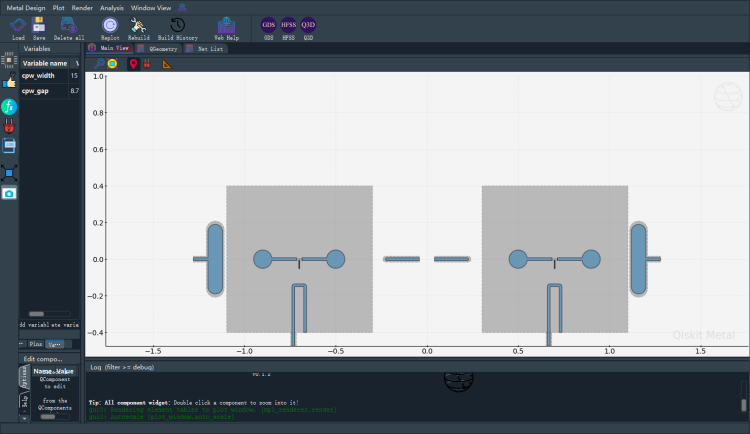

In [5]:
gui.screenshot()

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL

xmon_options = dict(
    connection_pads=dict(
        #a = dict( connector_location = '0', connector_type = '0'),
        readout_line = dict(connector_location = '90', connector_type = '0'),
        #c = dict(connector_location = '180', connector_type = '1'),
    ),
)

# Create a new Transmon Cross object with name 'Q3'
q3 = TransmonCrossFL(design, 'Q3', options=dict(pos_x = '0mm', pos_y = '-0.06mm', **xmon_options))

gui.rebuild()  # rebuild the design and plot
gui.autoscale() #resize GUI to see QComponent


In [7]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.0325mm', orientation='0',
        lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-1.0325mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)


# Transmission_Line = {'pin_inputs':
#            {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
#              'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
#             'lead': {'start_straight': '3970um', 'end_straight': '3970um',
#                     # 'start_jogged_extension': jogs_in,
#                     # 'anchors': anchors1,
#                     }, 
#                     'total_length': '8mm', 'fillet': "90um"
#             }

# TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()



In [8]:
ops=dict(fillet='90um')

In [9]:
from collections import OrderedDict


anchors = OrderedDict()
anchors[0] = np.array([-3.5, 1.0])
anchors[1] = np.array([-2.5, 3.0])
anchors[2] = np.array([2.5, 3.0])
anchors[3] = np.array([3.5, 1.0])

between_anchors = OrderedDict() # S, M, PF
between_anchors[0] = "S"
between_anchors[1] = "PF"

options = {'pin_inputs': 
            {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'}, 
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '91um', 'end_straight': '90um'},
            'step_size': '0.25mm',
            'anchors': anchors,
            'between_anchors': between_anchors,
            **ops
           }

#Transmission_Line = RoutePathfinder(design, 'line', options)
Transmission_Line = RouteMixed(design, 'line', options)


gui.rebuild()
gui.autoscale()

In [30]:
## Q1 flux-bias and charge line's lauch pad
# launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.33mm', orientation='0',
#                       lead_length='30um', pad_width='200um',
#         pad_height='200um', pad_gap='112um',
#                     )
# lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-3.0mm', orientation='0',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)
gui.rebuild()

In [31]:
## Q2 flux-bias and charge line's lauch pad
# launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-1.33mm', orientation='180',
#                       lead_length='30um', pad_width='200um',
#         pad_height='200um', pad_gap='112um',
#                     )
# lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-3.0mm', orientation='180',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)

gui.rebuild()

In [27]:
launch_options = dict(chip='main', pos_x='0.0mm', pos_y='-4.0mm', orientation='90',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)

gui.rebuild()

In [10]:
# Charge Line for Q1

# XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
#         options = dict(chip='main', fillet='99um',
#             lead=dict(start_straight='150um', end_straight='600um', 
#                       ),
#                          pin_inputs=Dict( start_pin=Dict(
#                                           component='Q1',
#                                                pin='charge_line'),
#                                                 end_pin=Dict(
#                                             component='LPCL1',
#                                             pin='tie')
#                                             )))

# gui.rebuild()

In [17]:
# Flux Bias Line for Q1

ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um', ),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [12]:
# Charge Lıne for Q2

# XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
#                         fillet='80um',
#                 lead=dict(start_straight='150um', end_straight='850um'),
#                                             pin_inputs=Dict(
#                                                 start_pin=Dict(
#                                                     component='Q2',
#                                                     pin='charge_line'),
#                                                 end_pin=Dict(
#                                                     component='LPCL2',
#                                                     pin='tie')
#                                             )))

# gui.rebuild()

In [18]:
# Flux Bias Line for Q2

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [33]:
# Flux Bias Line for Q3

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_line'),
                                                end_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [21]:
# Lambda/2 resonators - Resonator1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-3.462267mm', pos_y='0mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='7.21mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

gui.rebuild()

In [22]:
# Lambda/2 resonators - Resonator2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='3.462267mm',  pos_y='0mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='7.21mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

gui.rebuild()

In [35]:
# Lambda/2 resonators - Resonator3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='0mm',  pos_y='2.962267mm', orientation='180'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='10.21mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='0um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

gui.rebuild()

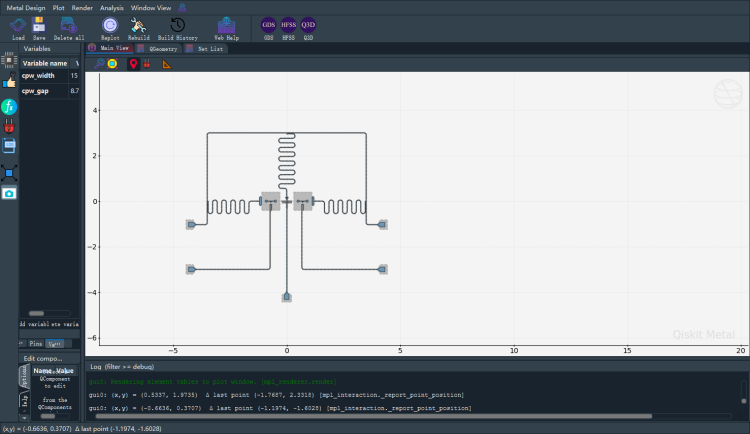

In [36]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [5]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [6]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [7]:
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings

c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [8]:
c1.sim.run(components=['Q2'], open_terminations=[('Q2', 'flux_bias_line')])
c1.sim.capacitance_matrix

INFO 01:02AM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:02AM [load_ansys_project]: 	Opened Ansys App
INFO 01:02AM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:02AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project39
INFO 01:02AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:02AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:02AM [connect]: 	Connected to project "Project39" and design "Design_q3d" 😀 

INFO 01:02AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:02AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:02AM [analyze]: Analyzing setup Setup
INFO 01:05AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmppcw00h_h.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

EmptyDataError: No columns to parse from file

In [ ]:
# capacitance with pocket-height=650um

Cpad_top = 
Cpad_bot = 
Creadout_bot = 
Ccharge_top = 
Cfluxpad_top = 
Cfluxpad_bot = 

C_pads =

C_top = Cpad_top + Ccharge_top + Cfluxpad_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Total Capacitance:', Csigma, 'fF')

In [44]:
c1.sim.run(components=['Q2'], open_terminations=[('Q2', 'charge_line'), ('Q2', 'flux_bias_line'), ('Q2', 'fake_flux_bias_line'), ('Q2', 'readout_line')])
c1.sim.capacitance_matrix

INFO 04:18AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:18AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:18AM [analyze]: Analyzing setup Setup
INFO 04:20AM [get_matrix]: Exporting matrix data to (C:\Users\siywa\AppData\Local\Temp\tmpsb4shg7o.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:20AM [get_matrix]: Exporting matrix data to (C:\Users\siywa\AppData\Local\Temp\tmp7x69cxpm.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:20AM [get_matrix]: Exporting matrix data to (C:\Users\siywa\AppData\Local\Temp\tmph83uude7.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 04:20AM [get_matrix]: Exporting matrix data to (C:\Users\siywa\AppData\Local\Temp\tmpxw5cjy3z.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 50000000

,charge_line_Q2,flux_bias_line_Q2,ground_main_plane,pad_bot_0_Q2,pad_bot_1_Q2,pad_top_0_Q2,pad_top_1_Q2,readout_padNline_Q2
charge_line_Q2,33.85591,-0.05495,-33.51083,-0.12184,-0.00222,-0.00215,-0.03364,-0.01552
flux_bias_line_Q2,-0.05495,57.10494,-47.48110,-3.23920,-0.32863,-0.32585,-3.24026,-0.85516
ground_main_plane,-33.51083,-47.48110,313.26997,-23.93429,-0.81163,-0.80474,-21.99276,-111.65624
pad_bot_0_Q2,-0.12184,-3.23920,-23.93429,33.82399,-0.78467,-0.61920,-3.09038,-0.52809
pad_bot_1_Q2,-0.00222,-0.32863,-0.81163,-0.78467,6.05628,-3.41622,-0.62414,-0.03503
pad_top_0_Q2,-0.00215,-0.32585,-0.80474,-0.61920,-3.41622,6.03654,-0.77891,-0.03625
pad_top_1_Q2,-0.03364,-3.24026,-21.99276,-3.09038,-0.62414,-0.77891,33.78526,-2.50511
readout_padNline_Q2,-0.01552,-0.85516,-111.65624,-0.52809,-0.03503,-0.03625,-2.50511,117.10289


In [45]:
c1.sim.run(components=['Q3'], open_terminations=[('Q3', 'flux_line'),  ('Q3', 'readout_line')])
c1.sim.capacitance_matrix

INFO 04:54AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:54AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:54AM [analyze]: Analyzing setup Setup


com_error: (-2147352567, '发生意外。', (0, None, None, None, 0, -2147024349), None)